<a href="https://colab.research.google.com/github/mahmoudta74/FIDVR/blob/main/FIDVR_khorasan_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

from torch.utils.tensorboard import SummaryWriter
%load_ext tensorboard
%matplotlib inline
from IPython.display import display, clear_output
import pandas as pd
import time
import json

from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from tqdm.notebook import tqdm

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torch.optim as optim

torch.set_printoptions(linewidth=120) #Disply Option for output
torch.set_grad_enabled(True)          # already on by default\


%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)


font1 = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 18,
        }


font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 13,
        }


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWi59ik-UtsS4k1FV6TFMXDZpDN7Hqyp5AUmkvgwUfDlnDftFpk2yu4


In [ ]:
class Network(nn.Module):

    def __init__(self, n_features, n_hidden, n_layers):
        super(Network, self).__init__()

        self.n_features = n_features
        self.n_hidden = n_hidden
        self.n_layers = n_layers

        self.lstm = nn.LSTM(input_size= n_features, hidden_size= n_hidden,
                             num_layers = n_layers, batch_first = True,
                             dropout = 0.4
                             )
            

        self.linear1 = nn.Linear(in_features= n_hidden, out_features= 5)
        self.linear2 = nn.Linear(in_features= 5, out_features= 1)
        #self.linear3 = nn.Linear(in_features= 5, out_features= 1)

    def forward(self, x):

        h0 = torch.randn(self.n_layers, x.size(0), self.n_hidden).to('cuda')  # (batch_size= x.size(0) )
        c0 = torch.randn(self.n_layers, x.size(0), self.n_hidden).to('cuda')
        output, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.linear1(hn[-1])
        out = self.linear2(out)
        #out = self.linear3(out)

        return out

In [ ]:
network = torch.load('/content/drive/MyDrive/FIDVR_model_results/0.1/0.4_5_2048_200_1/model2.ckpt')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final_sim_1.csv')
data = df.to_numpy()

In [ ]:
Predictions = []
Rs_JAD = []

for i in range(123, 123+61, 1):

    Rs_i = data[:, i]
    Rs_JAD.append(Rs_i[15])
    tst_i = torch.tensor(Rs_i[0:18], dtype=torch.float32).reshape(1,18,1).to('cuda')

    preds_i = []
    with torch.no_grad():
    
        pred = network(tst_i)
        preds_i.append(pred.squeeze().item())
        #print(preds)

        for i in range(7):
            tst_i = torch.roll(tst_i, -1, 1)
            tst_i[0,17,0] = pred.squeeze().item()
            #print(tst)
            pred = network(tst_i)
            preds_i.append(pred.squeeze().item())
    
    Predictions.append(preds_i)
        

In [ ]:
Ri = []

for i in range (61):

    Ri.append(0.6*((Predictions[i][-1] - Rs_JAD[i])/0.8) + 0.4*Rs_JAD[i])
Ri = np.array(Ri)

In [ ]:
Load_shedding_bus = np.argmin(Ri)
print(df.columns[123+Load_shedding_bus])
Load_shedding_bus

index_tabas3


40

In [ ]:
Ri

array([-0.32492305, -0.84879866, -0.12166332, -0.38217795, -0.92429025,
        0.18328208, -0.21084965, -0.59698423,  0.26499645, -0.57736688,
        0.10495308, -0.48265551,  0.21201953, -0.13030083, -0.6425956 ,
       -0.25244404, -0.14677762, -0.86458517,  0.1997047 ,  0.21030517,
        0.19349081, -0.01168547,  0.18530195, -0.32759321,  0.22721433,
        0.22721686,  0.0703162 , -0.90219782, -0.1088039 ,  0.20365598,
       -0.45979378, -0.4666062 , -0.84863539,  0.17616645,  0.21811392,
       -0.69626798, -0.30407489, -0.14607933, -0.11977421, -0.35031506,
       -0.94236874,  0.34394013, -0.35825189, -0.52732336,  0.01740808,
       -0.49931007, -0.70137598,  0.20032305,  0.12845122, -0.20259689,
        0.0752754 ,  0.14319802, -0.0120109 , -0.06476593, -0.73677232,
        0.20231355,  0.36107572,  0.36251553, -0.37128023, -0.79404525,
       -0.49110628])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final_sim_2.csv')
data = df.to_numpy()

In [ ]:
Predictions = []
Rs_JAD = []

for i in range(123, 123+61, 1):

    Rs_i = data[:, i]
    Rs_JAD.append(Rs_i[17])
    tst_i = torch.tensor(Rs_i[2:20], dtype=torch.float32).reshape(1,18,1).to('cuda')

    preds_i = []
    with torch.no_grad():
    
        pred = network(tst_i)
        preds_i.append(pred.squeeze().item())
        #print(preds)

        for i in range(7):
            tst_i = torch.roll(tst_i, -1, 1)
            tst_i[0,17,0] = pred.squeeze().item()
            #print(tst)
            pred = network(tst_i)
            preds_i.append(pred.squeeze().item())
    
    Predictions.append(preds_i)
        

In [ ]:
Ri = []

for i in range (61):

    Ri.append(0.6*((Predictions[i][-1] - Rs_JAD[i])/0.8) + 0.4*Rs_JAD[i])
Ri = np.array(Ri)

In [ ]:
Load_shedding_bus = np.argmin(Ri)
print(df.columns[123+Load_shedding_bus])
Load_shedding_bus

index_bardskn3


1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final_sim_3.csv')
data = df.to_numpy()

In [ ]:
Predictions = []
Rs_JAD = []

for i in range(123, 123+61, 1):

    Rs_i = data[:, i]
    Rs_JAD.append(Rs_i[19])
    tst_i = torch.tensor(Rs_i[4:22], dtype=torch.float32).reshape(1,18,1).to('cuda')

    preds_i = []
    with torch.no_grad():
    
        pred = network(tst_i)
        preds_i.append(pred.squeeze().item())
        #print(preds)

        for i in range(7):
            tst_i = torch.roll(tst_i, -1, 1)
            tst_i[0,17,0] = pred.squeeze().item()
            #print(tst)
            pred = network(tst_i)
            preds_i.append(pred.squeeze().item())
    
    Predictions.append(preds_i)
        

In [ ]:
Ri = []

for i in range (61):

    Ri.append(0.6*((Predictions[i][-1] - Rs_JAD[i])/0.8) + 0.4*Rs_JAD[i])
Ri = np.array(Ri)

In [ ]:
Load_shedding_bus = np.argmin(Ri)
print(df.columns[123+Load_shedding_bus])
Load_shedding_bus

index_bushruye3


4

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final_sim_4.csv')
data = df.to_numpy()

In [ ]:
Predictions = []
Rs_JAD = []

for i in range(123, 123+61, 1):

    Rs_i = data[:, i]
    Rs_JAD.append(Rs_i[21])
    tst_i = torch.tensor(Rs_i[6:24], dtype=torch.float32).reshape(1,18,1).to('cuda')

    preds_i = []
    with torch.no_grad():
    
        pred = network(tst_i)
        preds_i.append(pred.squeeze().item())
        #print(preds)

        for i in range(7):
            tst_i = torch.roll(tst_i, -1, 1)
            tst_i[0,17,0] = pred.squeeze().item()
            #print(tst)
            pred = network(tst_i)
            preds_i.append(pred.squeeze().item())
    
    Predictions.append(preds_i)
        

In [ ]:
Ri = []

for i in range (61):

    Ri.append(0.6*((Predictions[i][-1] - Rs_JAD[i])/0.8) + 0.4*Rs_JAD[i])
Ri = np.array(Ri)

In [ ]:
Load_shedding_bus = np.argmin(Ri)
print(df.columns[123+Load_shedding_bus])
Load_shedding_bus

index_kheirabad3


59

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final_sim_5.csv')
data = df.to_numpy()

In [ ]:
Predictions = []
Rs_JAD = []

for i in range(123, 123+61, 1):

    Rs_i = data[:, i]
    Rs_JAD.append(Rs_i[23])
    tst_i = torch.tensor(Rs_i[8:26], dtype=torch.float32).reshape(1,18,1).to('cuda')

    preds_i = []
    with torch.no_grad():
    
        pred = network(tst_i)
        preds_i.append(pred.squeeze().item())
        #print(preds)

        for i in range(7):
            tst_i = torch.roll(tst_i, -1, 1)
            tst_i[0,17,0] = pred.squeeze().item()
            #print(tst)
            pred = network(tst_i)
            preds_i.append(pred.squeeze().item())
    
    Predictions.append(preds_i)
        

In [ ]:
Ri = []

for i in range (61):

    Ri.append(0.6*((Predictions[i][-1] - Rs_JAD[i])/0.8) + 0.4*Rs_JAD[i])
Ri = np.array(Ri)

In [ ]:
Load_shedding_bus = np.argmin(Ri)
print(df.columns[123+Load_shedding_bus])
Load_shedding_bus

index_khaf3


17

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final_sim_6.csv')
data = df.to_numpy()
t = data[:, 0]

In [ ]:
Predictions = []
Rs_JAD = []

for i in range(123, 123+61, 1):

    Rs_i = data[:, i]
    Rs_JAD.append(Rs_i[25])
    tst_i = torch.tensor(Rs_i[10:28], dtype=torch.float32).reshape(1,18,1).to('cuda')

    preds_i = []
    with torch.no_grad():
    
        pred = network(tst_i)
        preds_i.append(pred.squeeze().item())
        #print(preds)

        for i in range(7):
            tst_i = torch.roll(tst_i, -1, 1)
            tst_i[0,17,0] = pred.squeeze().item()
            #print(tst)
            pred = network(tst_i)
            preds_i.append(pred.squeeze().item())
    
    Predictions.append(preds_i)
        

In [ ]:
Ri = []

for i in range (61):

    Ri.append(0.6*((Predictions[i][-1] - Rs_JAD[i])/0.8) + 0.4*Rs_JAD[i])
Ri = np.array(Ri)

In [ ]:
Load_shedding_bus = np.argmin(Ri)
print(df.columns[123+Load_shedding_bus])
Load_shedding_bus

index_hajiabad3


14

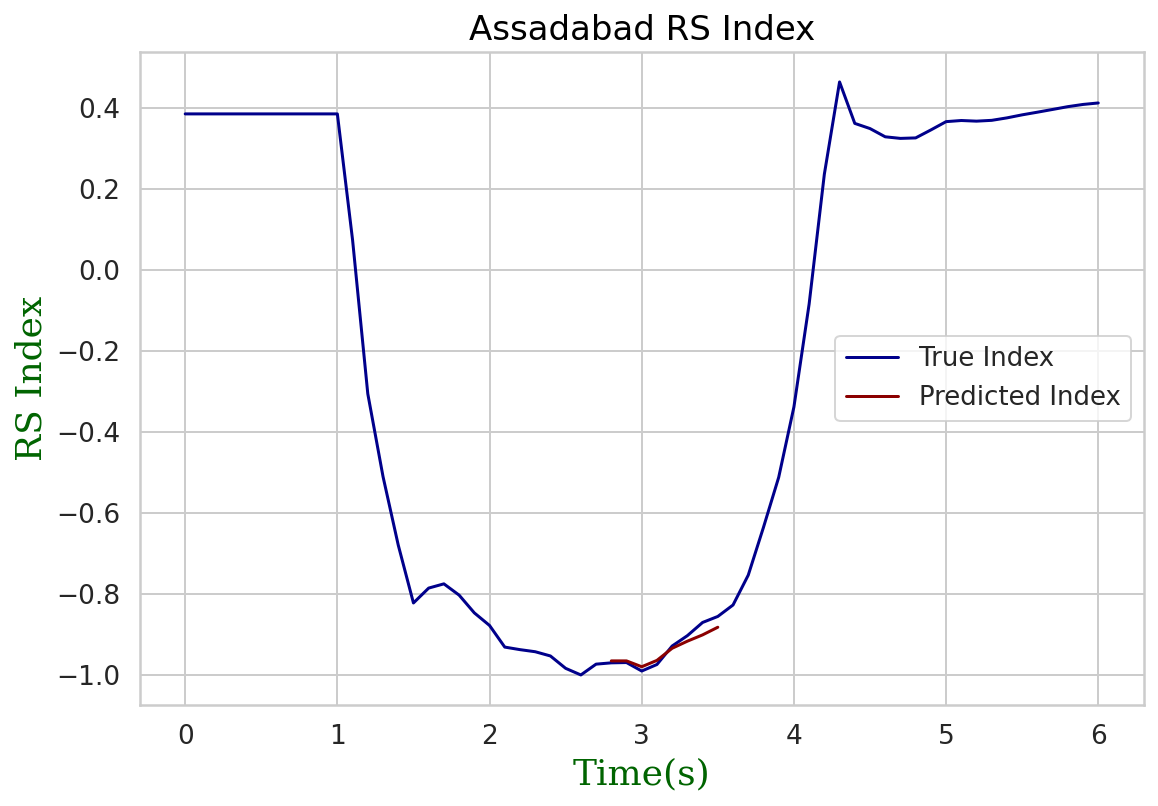

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(t[0:61], data[0:61,123], label='True Index', c='darkblue')
plt.plot(t[28:36], Predictions[0], label='Predicted Index',c= 'darkred')

plt.title('Assadabad RS Index', c='black', fontsize = 17)
plt.xlabel('Time(s)', fontdict=font1)
plt.ylabel('RS Index', fontdict=font1)

plt.legend(fontsize = 13, loc=7)
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final_sim_7.csv')
data = df.to_numpy()
t = data[:, 0]

In [ ]:
Predictions = []
Rs_JAD = []

for i in range(123, 123+61, 1):

    Rs_i = data[:, i]
    Rs_JAD.append(Rs_i[27])
    tst_i = torch.tensor(Rs_i[12:30], dtype=torch.float32).reshape(1,18,1).to('cuda')

    preds_i = []
    with torch.no_grad():
    
        pred = network(tst_i)
        preds_i.append(pred.squeeze().item())
        #print(preds)

        for i in range(7):
            tst_i = torch.roll(tst_i, -1, 1)
            tst_i[0,17,0] = pred.squeeze().item()
            #print(tst)
            pred = network(tst_i)
            preds_i.append(pred.squeeze().item())
    
    Predictions.append(preds_i)
        

In [ ]:
Ri = []

for i in range (61):

    Ri.append(0.6*((Predictions[i][-1] - Rs_JAD[i])/0.8) + 0.4*Rs_JAD[i])
Ri = np.array(Ri)

In [ ]:
Load_shedding_bus = np.argmin(Ri)
print(df.columns[123+Load_shedding_bus])
Load_shedding_bus

index_rashtkhr3


27

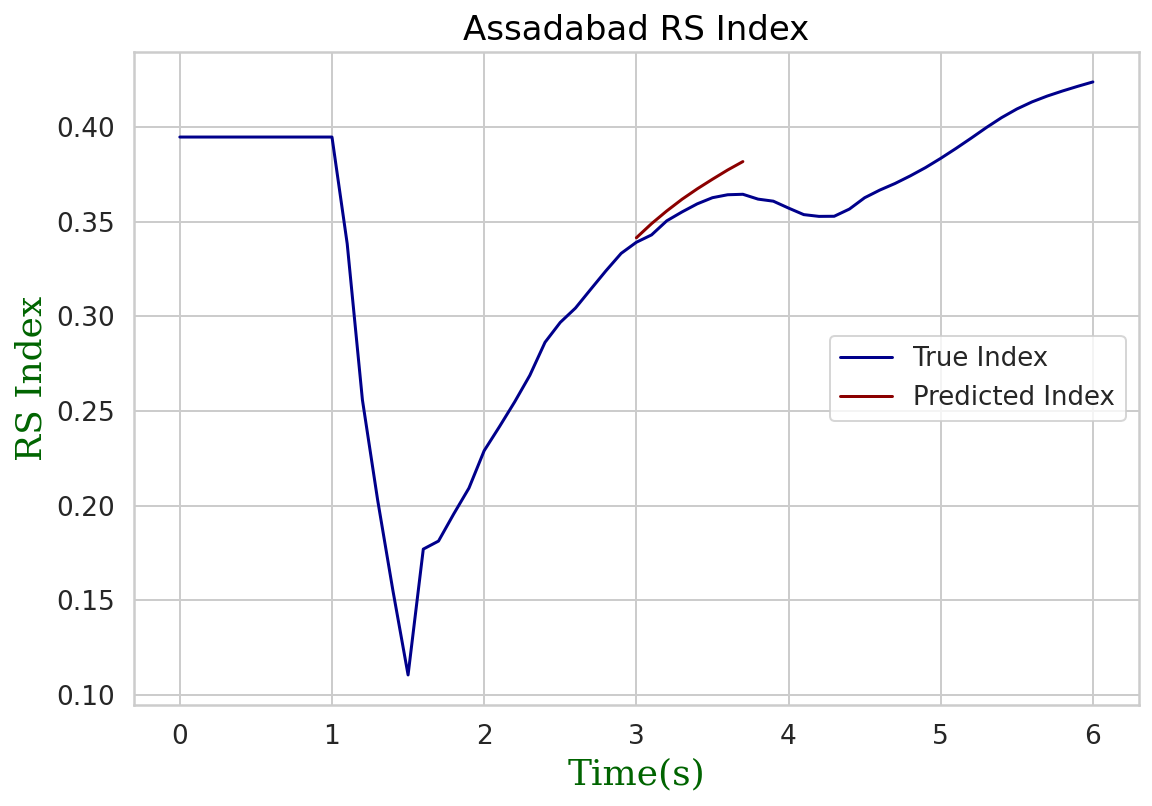

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(t[0:61], data[0:61,142], label='True Index', c='darkblue')
plt.plot(t[30:38], Predictions[19], label='Predicted Index',c= 'darkred')

plt.title('Assadabad RS Index', c='black', fontsize = 17)
plt.xlabel('Time(s)', fontdict=font1)
plt.ylabel('RS Index', fontdict=font1)

plt.legend(fontsize = 13, loc=7)
plt.show()

No handles with labels found to put in legend.


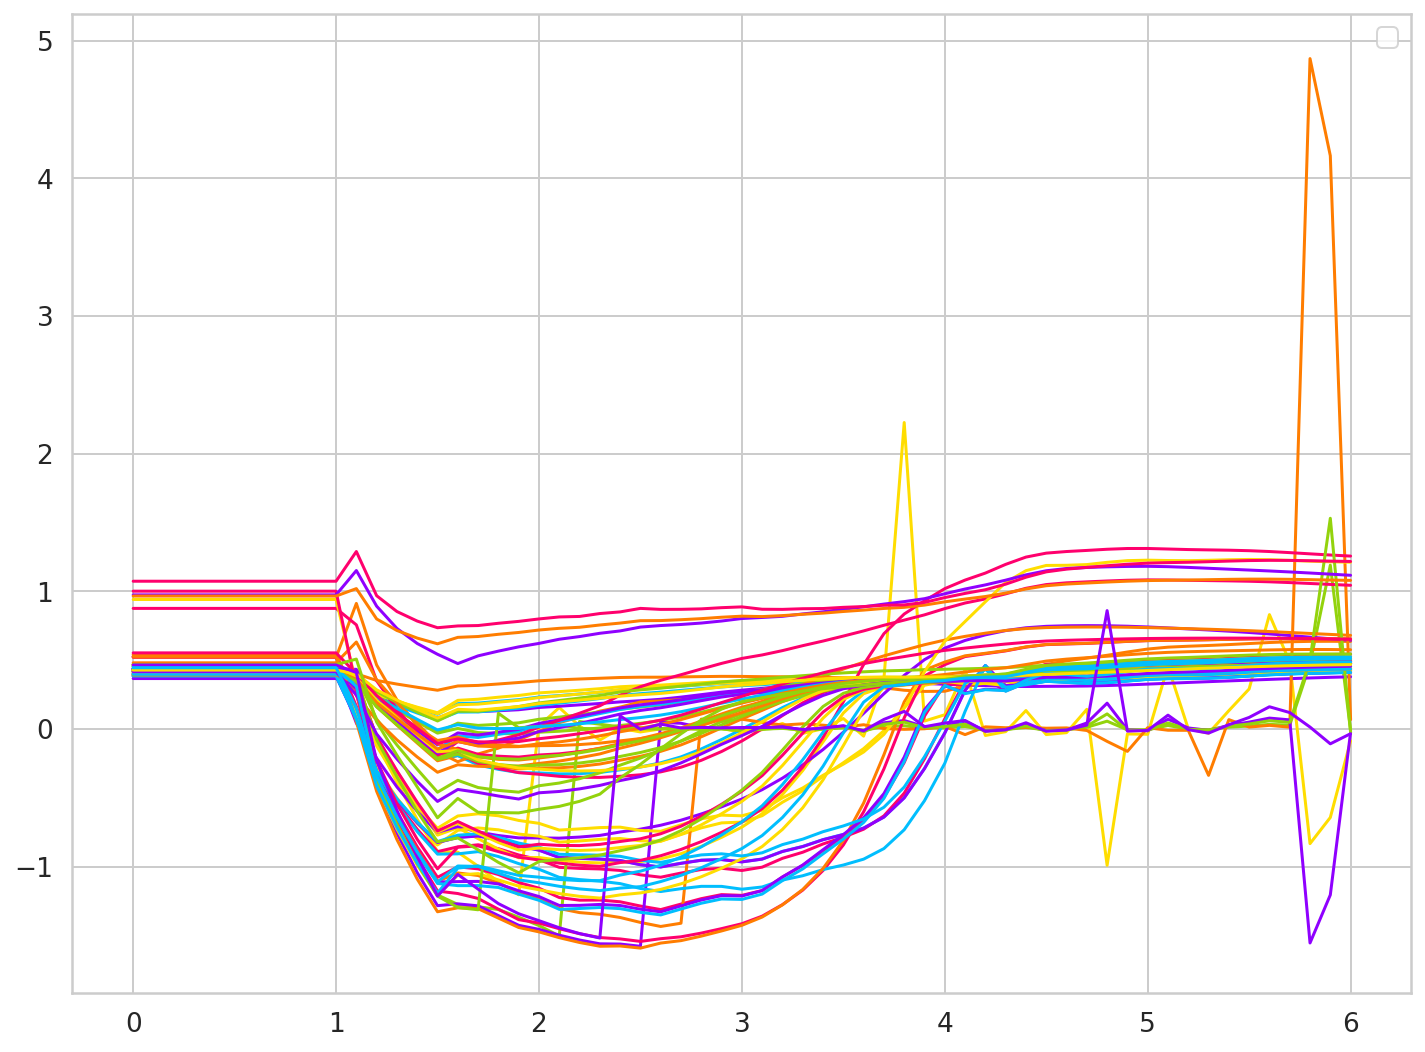

In [ ]:
plt.figure(figsize=(12,9))

for i in range(123, 123+61, 1):
    plt.plot(t[0:61], data[0:61,i])#, label= df.columns[i])

plt.legend()


# stable

In [12]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final_stable.csv')
data = df.to_numpy()
t = data[:, 0]

In [13]:
Predictions = []
Rs_JAD = []

for i in range(184, 184+61, 1):

    Rs_i = data[:, i]
    Rs_JAD.append(Rs_i[15])
    tst_i = torch.tensor(Rs_i[0:18], dtype=torch.float32).reshape(1,18,1).to('cuda')

    preds_i = []
    with torch.no_grad():
    
        pred = network(tst_i)
        preds_i.append(pred.squeeze().item())
        #print(preds)

        for i in range(7):
            tst_i = torch.roll(tst_i, -1, 1)
            tst_i[0,17,0] = pred.squeeze().item()
            #print(tst)
            pred = network(tst_i)
            preds_i.append(pred.squeeze().item())
    
    Predictions.append(preds_i)
        

In [14]:
Ri = []

for i in range (61):

    Ri.append(0.6*((Predictions[i][-1] - Rs_JAD[i])/0.8) + 0.4*Rs_JAD[i])
Ri = np.array(Ri)

In [15]:
Ri

array([ 0.05389727, -0.66708999,  0.23947475,  0.00771962, -0.8401365 ,
        0.24207325,  0.1954066 , -0.0763445 ,  0.20372663, -0.01002096,
        0.22500799,  0.39809594,  0.26074387,  0.28130798, -0.15213929,
        0.14539236,  0.23322313, -0.05984771,  0.26791537,  0.26914944,
        0.20169694,  0.26472259,  0.28540761,  0.05667854,  0.33111615,
        0.3157433 ,  0.45829577, -0.20975146,  0.24239031,  0.27212953,
       -0.14016853,  0.24853903,  0.02867217,  0.42551961,  0.27600029,
       -0.33787168,  0.10773177,  0.59215766,  0.14646143,  0.65398124,
       -0.91318219,  0.29010429,  0.33555432,  0.01010575,  0.2098302 ,
        0.0420319 , -0.36163976,  0.30414243,  0.23493021,  0.15233782,
        0.28561246,  0.35338074,  0.28552093,  0.28160366, -0.45287588,
        0.26986334,  0.39602385,  0.34909458,  0.23078417, -0.15018663,
        0.15539523])

In [17]:
Load_shedding_bus = np.argmin(Ri)
print(df.columns[184+Load_shedding_bus])
Load_shedding_bus

index_tabas3


40

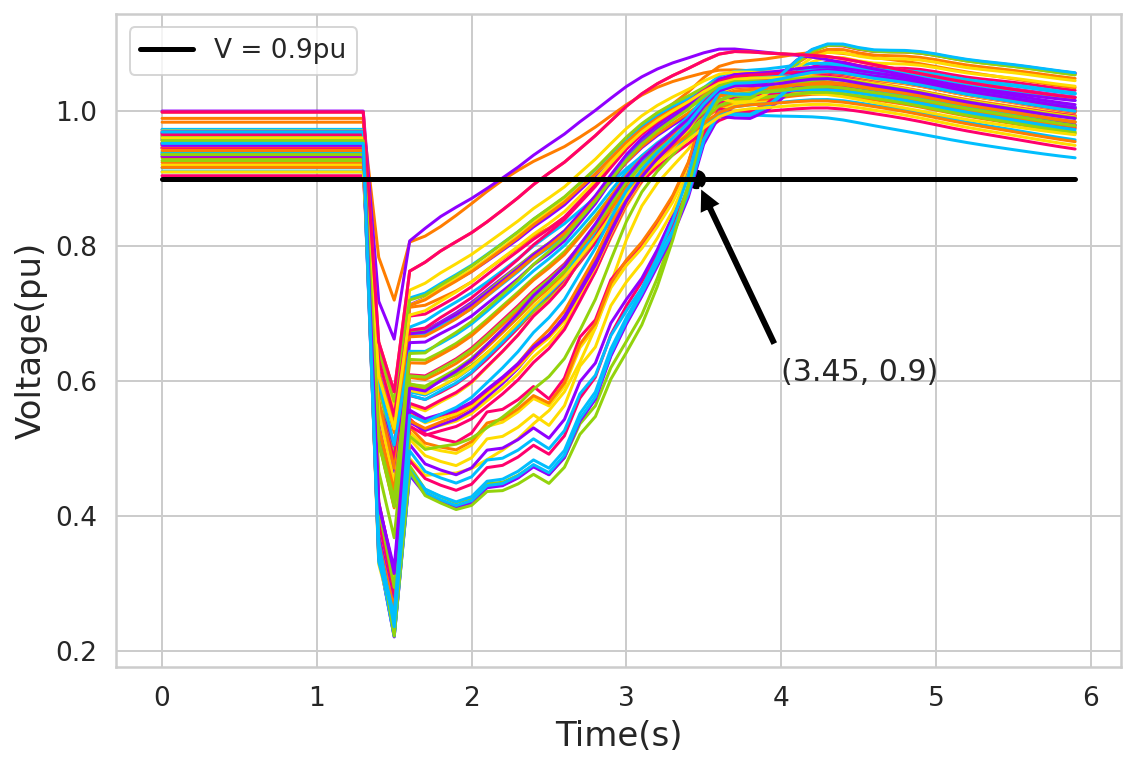

In [23]:
plt.figure(figsize=(9,6))

for i in range(1, 184, 3):
    plt.plot(t[0:61], data[0:61,i])


plt.annotate('(3.45, 0.9)', xy =(3.45, 0.9),
                xytext =(4, 0.6),  fontsize=15 ,
                arrowprops = dict(facecolor ='black',
                 shrink = 0.05))

plt.plot(t[0:61], 0.9*np.ones((60)), c='black', label='V = 0.9pu',  linewidth=2.5)
plt.scatter(3.45, 0.9, c='black', s=75)
plt.xlabel('Time(s)', fontsize=17)
plt.ylabel('Voltage(pu)', fontsize=17)
plt.legend()

No handles with labels found to put in legend.


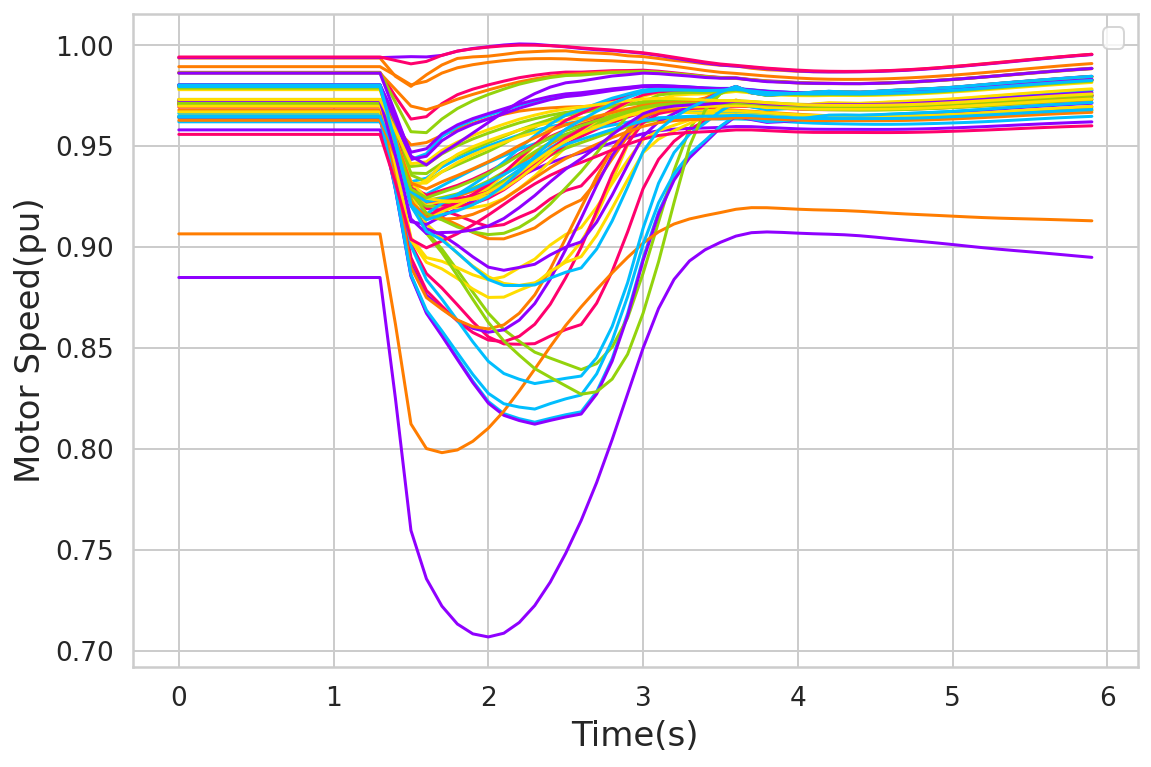

In [25]:
plt.figure(figsize=(9,6))

for i in range(3, 184, 3):
    plt.plot(t[0:61], data[0:61,i])


plt.xlabel('Time(s)', fontsize=17)
plt.ylabel('Motor Speed(pu)', fontsize=17)
plt.legend()

In [26]:
df = pd.read_csv('/content/drive/MyDrive/dataset/final_stable2.csv')
data = df.to_numpy()
t = data[:, 0]

In [27]:
print(df.columns[121])

u_tabas3


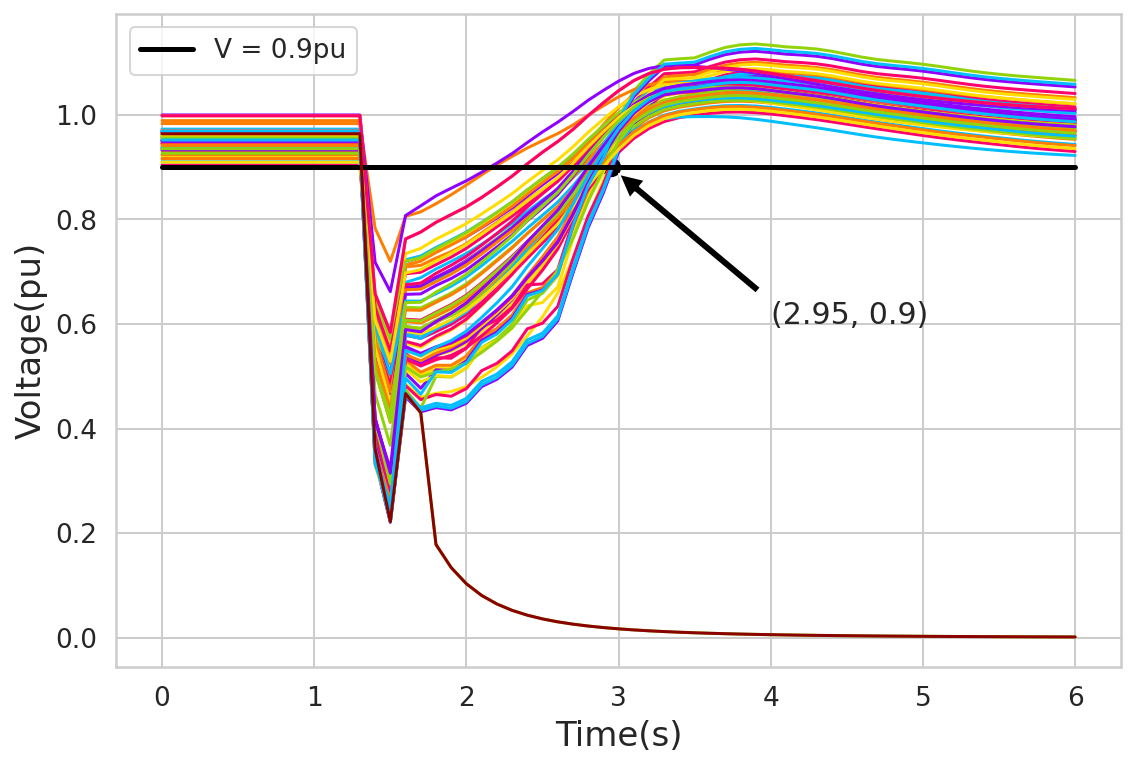

In [35]:
plt.figure(figsize=(9,6))

for i in range(1, 184, 3):
    plt.plot(t[0:61], data[0:61,i])


plt.annotate('(2.95, 0.9)', xy =(2.95, 0.9),
                xytext =(4, 0.6),  fontsize=15,
                arrowprops = dict(facecolor ='black',
                 shrink = 0.05))



plt.plot(t[0:61], 0.9*np.ones((61)), c='black', label='V = 0.9pu',  linewidth=2.5)
plt.scatter(2.95, 0.9, c='black', s=75)
plt.xlabel('Time(s)', fontsize=17)
plt.ylabel('Voltage(pu)', fontsize=17)
plt.plot(t[0:61], data[0:61,121], c='darkred')
plt.legend()

In [ ]:
#plt.plot(t[0:61], data[0:61,121])
plt.plot(t[0:61], data[0:61,121])

No handles with labels found to put in legend.


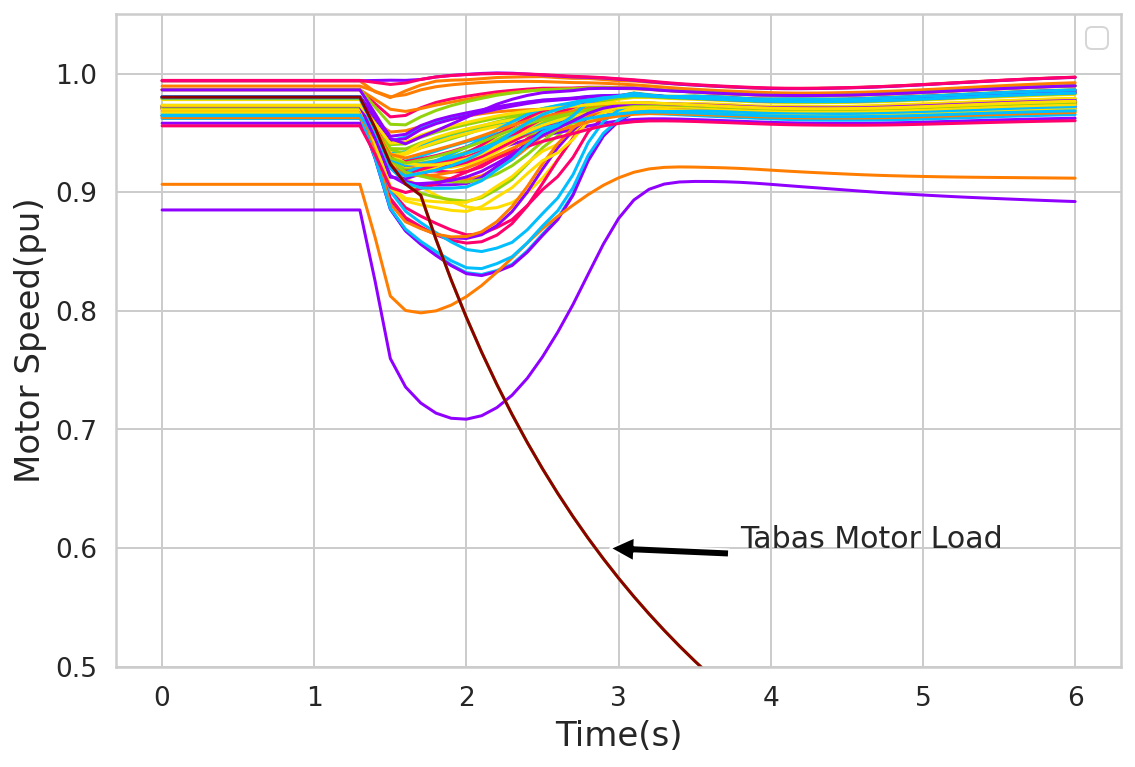

In [45]:
plt.figure(figsize=(9,6))

for i in range(3, 184, 3):
    plt.plot(t[0:61], data[0:61,i])

plt.annotate('Tabas Motor Load', xy =(2.9, 0.6),
                xytext =(3.8, 0.6),  fontsize=15,
                arrowprops = dict(facecolor ='black',
                 shrink = 0.05))

plt.xlabel('Time(s)', fontsize=17)
plt.ylabel('Motor Speed(pu)', fontsize=17)
plt.plot(t[0:61], data[0:61,123], c='darkred')
plt.ylim(0.5,1.05)
plt.legend()